In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import preprocessing
import scipy
from scipy import stats

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [3]:
df = pd.read_csv('player_stats_baseball.csv')

In [4]:
df

,last_name,first_name,player_id,year,player_age,b_ab,b_total_hits,b_home_run,b_bb_percent,batting_avg,on_base_percent,on_base_plus_slg,b_rbi,b_game,r_run,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate,Unnamed: 19
0,Blackmon,Charlie,453568,2023,36,44,15,1,8.0,0.341,0.420,0.897,4,12,6,83.3,17.4,45.0,5.0,NaN
1,Solano,Donovan,456781,2023,35,38,13,0,4.9,0.342,0.390,0.811,3,11,4,90.9,14.9,46.7,3.3,NaN
2,McCutchen,Andrew,457705,2023,36,34,11,1,21.3,0.324,0.468,0.968,4,12,5,89.4,20.8,41.4,10.3,NaN
3,Turner,Justin,457759,2023,38,47,12,0,13.8,0.255,0.379,0.698,4,13,7,89.6,11.9,31.7,0.0,NaN
4,Andrus,Elvis,462101,2023,34,48,7,0,2.0,0.146,0.176,0.343,4,13,3,88.6,4.1,30.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Edman,Tommy,669242,2021,26,641,168,11,5.5,0.262,0.307,0.694,56,159,91,87.5,9.5,31.5,4.2,NaN
596,Solak,Nick,669256,2021,26,458,111,11,6.7,0.242,0.313,0.676,49,127,57,86.9,7.0,29.3,6.5,NaN
597,Hays,Austin,669720,2021,25,488,125,22,5.3,0.256,0.306,0.767,71,131,73,88.8,12.5,32.2,9.1,NaN
598,Lopez,Nicky,670032,2021,26,497,149,2,8.7,0.300,0.358,0.736,43,151,78,86.8,2.8,27.6,0.7,NaN


Text(0.5, 1.0, 'Runs per player')

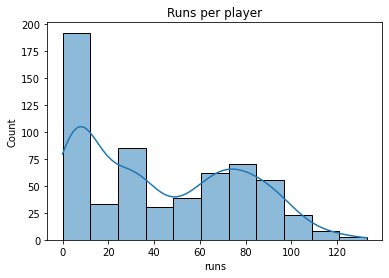

In [5]:
sns.histplot(df.r_run, kde=True)
plt.xlabel('runs')
plt.title('Runs per player')

Text(0.5, 1.0, 'Distribution of hits comparing average \n launch angle and exit velocity of players')

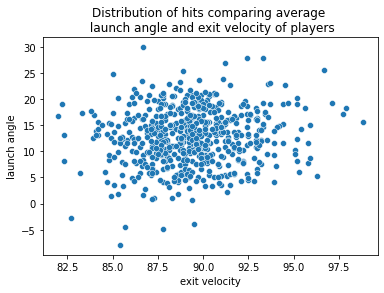

In [6]:
sns.scatterplot(x = df.exit_velocity_avg, y = df.launch_angle_avg)
plt.xlabel('exit velocity')
plt.ylabel('launch angle')
plt.title('Distribution of hits comparing average \n launch angle and exit velocity of players')

In [7]:
df['above_batavg'] = np.select([df.batting_avg > 0.261, df.batting_avg <= 0.261] , [0,1])


In [8]:
df.columns

Index(['last_name', ' first_name', 'player_id', 'year', 'player_age', 'b_ab',
       'b_total_hits', 'b_home_run', 'b_bb_percent', 'batting_avg',
       'on_base_percent', 'on_base_plus_slg', 'b_rbi', 'b_game', 'r_run',
       'exit_velocity_avg', 'launch_angle_avg', 'sweet_spot_percent',
       'barrel_batted_rate', 'Unnamed: 19', 'above_batavg'],
      dtype='object')

In [9]:
df.player_age.describe()

count    600.000000
mean      28.375000
std        3.524923
min       21.000000
25%       26.000000
50%       28.000000
75%       31.000000
max       41.000000
Name: player_age, dtype: float64

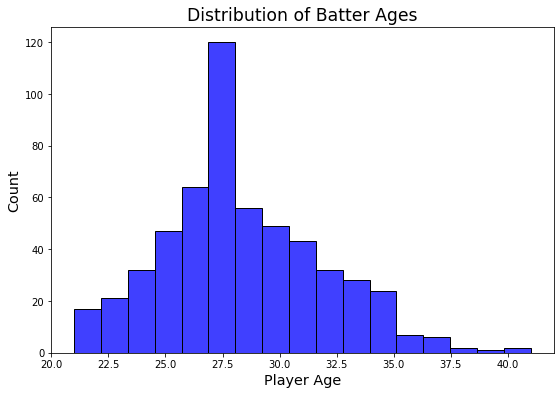

In [74]:
plt.figure(figsize=(9,6))
sns.histplot(df.player_age, color='b')
plt.xlabel('Player Age', fontsize='x-large')
plt.ylabel('Count', fontsize='x-large')
plt.title('Distribution of Batter Ages', fontsize='xx-large')
plt.savefig('batter_ages_dist')

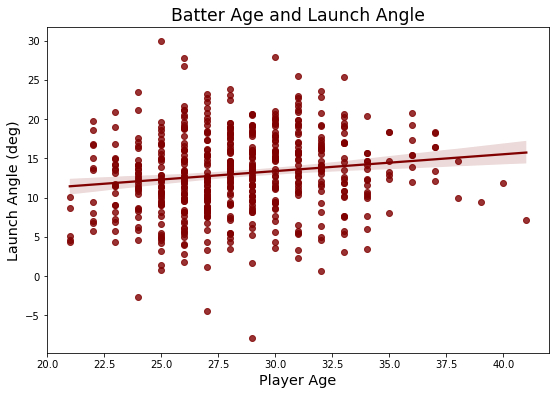

In [91]:
plt.figure(figsize=(9,6))
sns.regplot(df.player_age, df.launch_angle_avg, color='maroon')
plt.xlabel('Player Age', fontsize='x-large')
plt.ylabel('Launch Angle (deg)', fontsize='x-large')
plt.title('Batter Age and Launch Angle', fontsize='xx-large')
plt.savefig('age_launch')

In [77]:
display(stats.pearsonr(df.player_age, df.launch_angle_avg))

(0.14549067032455812, 0.0006133358240580916)

C:\Users\arist\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


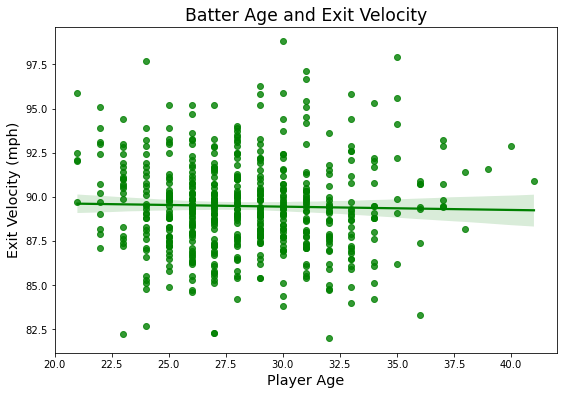

In [83]:
plt.figure(figsize=(9,6))
sns.regplot(df.player_age, df.exit_velocity_avg, color='g')
plt.xlabel('Player Age', fontsize='x-large')
plt.ylabel('Exit Velocity (mph)', fontsize='x-large')
plt.title('Batter Age and Exit Velocity', fontsize='xx-large')
plt.savefig('age_ev')

In [78]:
display(stats.pearsonr(df.player_age, df.exit_velocity_avg))

(-0.02524203997670978, 0.5543429748329181)

C:\Users\arist\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='player_age'>

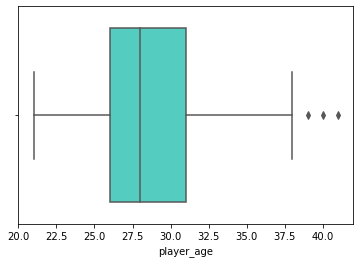

In [67]:
sns.boxplot(df.player_age, color='turquoise')

In [11]:
df.batting_avg.describe()

count    600.000000
mean       0.261430
std        0.045645
min        0.083000
25%        0.235000
50%        0.262000
75%        0.286000
max        0.500000
Name: batting_avg, dtype: float64

C:\Users\arist\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='batting_avg'>

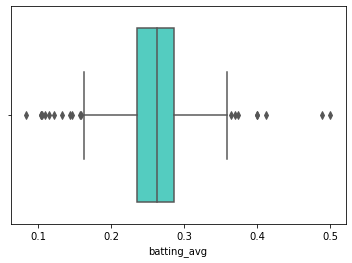

In [15]:
sns.boxplot(df.batting_avg, color='turquoise')

<AxesSubplot:xlabel='batting_avg', ylabel='Count'>

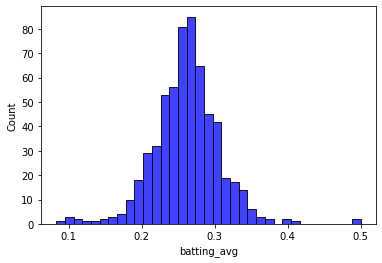

In [144]:
sns.histplot(df.batting_avg, color='b')

In [145]:
df.on_base_percent.describe()

count    599.000000
mean       0.336713
std        0.051263
min        0.125000
25%        0.309000
50%        0.334000
75%        0.364000
max        0.558000
Name: on_base_percent, dtype: float64

<AxesSubplot:xlabel='on_base_percent', ylabel='Count'>

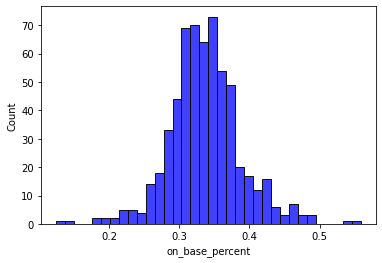

In [146]:
sns.histplot(df.on_base_percent, color='b')

In [147]:
df.exit_velocity_avg.describe()

count    599.000000
mean      89.326544
std        2.633292
min       82.000000
25%       87.650000
50%       89.300000
75%       90.800000
max       98.800000
Name: exit_velocity_avg, dtype: float64

In [148]:
df.launch_angle_avg.describe()

count    599.000000
mean      12.793990
std        5.327332
min       -7.900000
25%        9.350000
50%       12.900000
75%       16.400000
max       29.900000
Name: launch_angle_avg, dtype: float64

In [149]:
df.runs_per_ab.describe()

count    599.000000
mean       0.148671
std        0.040561
min        0.036364
25%        0.124476
50%        0.147177
75%        0.170779
max        0.363636
Name: runs_per_ab, dtype: float64

Text(0.5, 1.0, 'Distribution of hits comparing average \n launch angle and exit velocity of players')

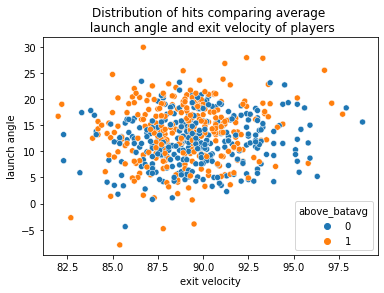

In [150]:
sns.scatterplot(x = df.exit_velocity_avg, y = df.launch_angle_avg, hue=df.above_batavg)
plt.xlabel('exit velocity')
plt.ylabel('launch angle')
plt.title('Distribution of hits comparing average \n launch angle and exit velocity of players')

In [151]:
good_players = df[df.batting_avg >0.261]
bad_players = df[df.batting_avg <= 0.261]
bad_players

,last_name,first_name,player_id,year,player_age,b_ab,b_total_hits,b_home_run,b_bb_percent,batting_avg,...,b_rbi,b_game,r_run,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate,Unnamed: 19,above_batavg,runs_per_ab
3,Turner,Justin,457759,2023,38,47,12,0,13.8,0.255,...,4,13,7,89.6,11.9,31.7,0.0,NaN,1,0.148936
4,Andrus,Elvis,462101,2023,34,48,7,0,2.0,0.146,...,4,13,3,88.6,4.1,30.0,0.0,NaN,1,0.062500
5,Santana,Carlos,467793,2023,37,48,12,2,11.1,0.250,...,6,13,5,89.4,16.4,44.4,11.1,NaN,1,0.104167
6,Escobar,Eduardo,500871,2023,34,39,4,1,4.7,0.103,...,4,12,3,84.2,15.7,23.3,3.3,NaN,1,0.076923
9,Segura,Jean,516416,2023,33,44,8,0,6.4,0.182,...,0,12,2,89.5,-3.9,25.0,3.1,NaN,1,0.045455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,Lowe,Brandon,664040,2021,26,535,132,39,11.1,0.247,...,99,149,97,89.3,16.9,37.2,14.0,NaN,1,0.181308
587,Chisholm Jr.,Jazz,665862,2021,23,464,115,18,6.7,0.248,...,53,124,70,90.2,9.0,29.0,9.0,NaN,1,0.150862
590,Garcia,Adolis,666969,2021,28,581,141,31,5.1,0.243,...,90,149,77,91.0,14.7,29.4,11.5,NaN,1,0.132530
596,Solak,Nick,669256,2021,26,458,111,11,6.7,0.242,...,49,127,57,86.9,7.0,29.3,6.5,NaN,1,0.124454


In [152]:
from scipy.stats import ttest_ind
ttest_ind(good_players['launch_angle_avg'], bad_players['launch_angle_avg'])

Ttest_indResult(statistic=-4.237217698958849, pvalue=2.6210842188131904e-05)

<AxesSubplot:xlabel='batting_avg', ylabel='Count'>

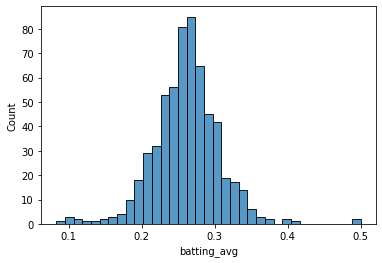

In [153]:
sns.histplot(df['batting_avg'])

In [54]:
df = df[df.r_run > 0]
df['runs_per_ab'] = df.r_run / df.b_ab

<AxesSubplot:xlabel='runs_per_ab', ylabel='Count'>

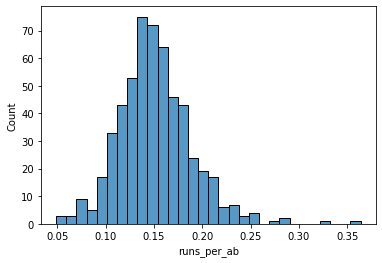

In [55]:
sns.histplot(df['runs_per_ab'])

In [16]:
df = df[df.b_home_run > 0]
df['hr_per_ab'] = df.b_home_run / df.b_ab

C:\Users\arist\AppData\Local\Temp\ipykernel_20804\2950684664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hr_per_ab'] = df.b_home_run / df.b_ab


In [17]:
df.hr_per_ab.describe()

count    551.000000
mean       0.043955
std        0.021484
min        0.001786
25%        0.027027
50%        0.042146
75%        0.056070
max        0.151515
Name: hr_per_ab, dtype: float64

C:\Users\arist\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\arist\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.05, 'Red: Batting avg > 0.261')

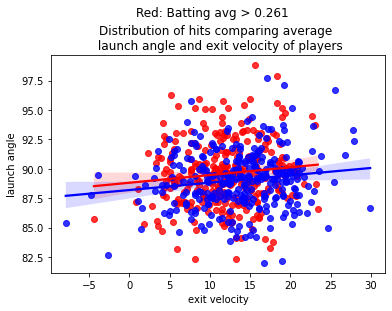

In [157]:
sns.regplot(good_players['launch_angle_avg'], good_players['exit_velocity_avg'], color = 'red')
sns.regplot(bad_players['launch_angle_avg'], bad_players['exit_velocity_avg'], color ='blue')
# s
plt.xlabel('exit velocity')
plt.ylabel('launch angle')
plt.title('Distribution of hits comparing average \n launch angle and exit velocity of players')
plt.suptitle('Red: Batting avg > 0.261', y=1.05)

<AxesSubplot:xlabel='launch_angle_avg', ylabel='Count'>

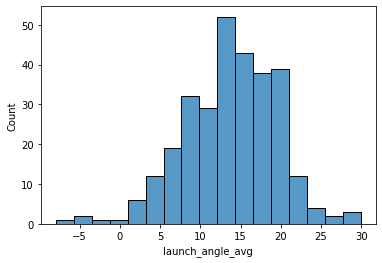

In [158]:
sns.histplot(bad_players['launch_angle_avg'])

<AxesSubplot:xlabel='player_age', ylabel='Count'>

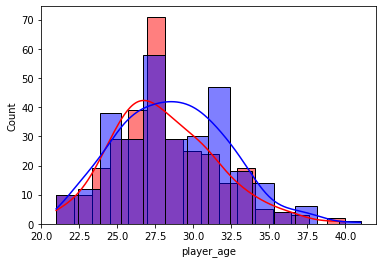

In [159]:
sns.histplot(good_players['player_age'], color='red', kde=True)
sns.histplot(bad_players['player_age'], color='blue', kde=True)

<AxesSubplot:xlabel='player_age', ylabel='batting_avg'>

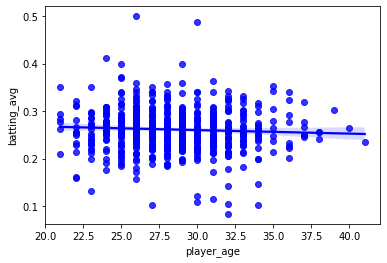

In [160]:
sns.regplot(x=df.player_age, y=df.batting_avg, color = 'blue')

In [161]:
display(stats.pearsonr(df.player_age, df.batting_avg))

(-0.05786913910263625, 0.157202223014516)

<AxesSubplot:xlabel='player_age', ylabel='on_base_percent'>

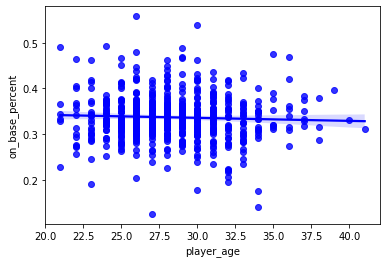

In [162]:
sns.regplot(x=df.player_age, y=df.on_base_percent, color = 'blue')

In [163]:
display(stats.pearsonr(df.player_age, df.on_base_percent))

(-0.04558885734474182, 0.26527401792805094)

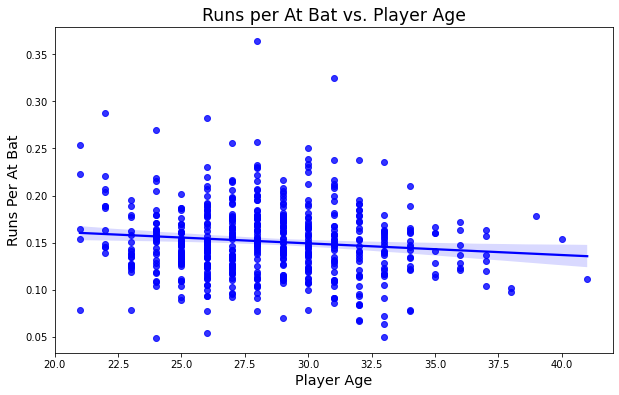

In [58]:
plt.figure(figsize=(10,6))

sns.regplot(x=df.player_age, y=df.runs_per_ab, color = 'blue')

plt.xlabel('Player Age', fontsize='x-large')
plt.ylabel('Runs Per At Bat', fontsize='x-large')
plt.title('Runs per At Bat vs. Player Age', fontsize='xx-large')

plt.savefig('age_runsAB')

In [165]:
display(stats.pearsonr(df.player_age, df.runs_per_ab))

(-0.11675727612398686, 0.00421779175980488)

<AxesSubplot:xlabel='b_ab', ylabel='batting_avg'>

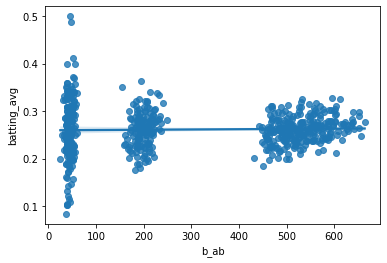

In [166]:
sns.regplot(x=df.b_ab, y=df.batting_avg)

<AxesSubplot:xlabel='player_age', ylabel='b_ab'>

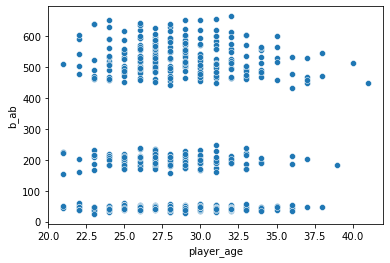

In [167]:
sns.scatterplot(x=df.player_age, y=df.b_ab)

<AxesSubplot:xlabel='player_age', ylabel='b_ab'>

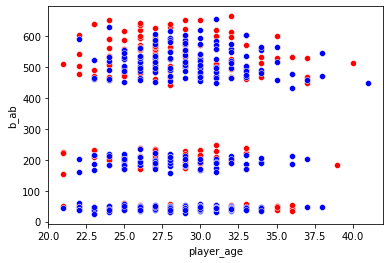

In [168]:
sns.scatterplot(x=good_players.player_age, y=good_players.b_ab, color='red')
sns.scatterplot(x=bad_players.player_age, y=bad_players.b_ab, color='blue')

<AxesSubplot:xlabel='player_age', ylabel='batting_avg'>

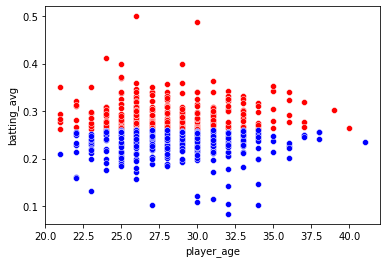

In [169]:
sns.scatterplot(x=good_players.player_age, y=good_players.batting_avg, color='red')
sns.scatterplot(x=bad_players.player_age, y=bad_players.batting_avg, color='blue')

<AxesSubplot:xlabel='exit_velocity_avg', ylabel='on_base_percent'>

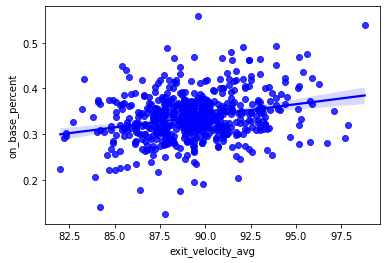

In [170]:
sns.regplot(x=df.exit_velocity_avg, y=df.on_base_percent, color = 'blue')

In [171]:
display(stats.pearsonr(df.exit_velocity_avg, df.on_base_percent))

(0.26026445789626607, 9.909186145930351e-11)

<AxesSubplot:xlabel='exit_velocity_avg', ylabel='batting_avg'>

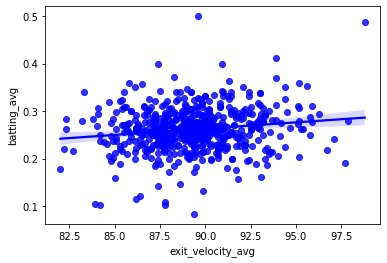

In [172]:
sns.regplot(x=df.exit_velocity_avg, y=df.batting_avg, color = 'blue')

In [173]:
display(stats.pearsonr(df.exit_velocity_avg, df.batting_avg))

(0.15307804801222108, 0.00016932550738826978)

<AxesSubplot:xlabel='player_age', ylabel='b_game'>

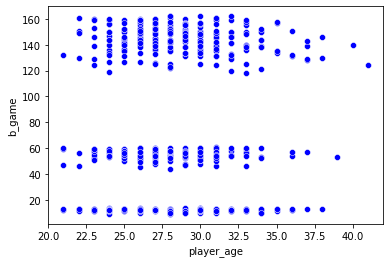

In [174]:
sns.scatterplot(x=df.player_age, y=df.b_game, color = 'blue')

C:\Users\arist\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hr_per_ab', ylabel='batting_avg'>

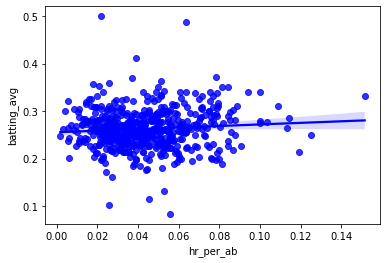

In [19]:
sns.regplot(df.hr_per_ab, df.batting_avg, color='b')

In [18]:
display(stats.pearsonr(df.hr_per_ab, df.batting_avg))

(0.08492810792108052, 0.04630258522214817)

C:\Users\arist\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='exit_velocity_avg', ylabel='hr_per_ab'>

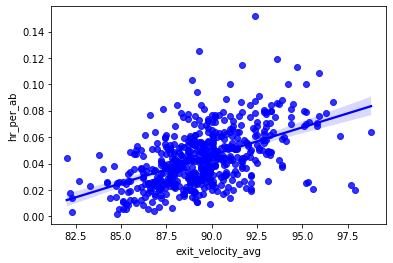

In [21]:
sns.regplot(df.exit_velocity_avg, df.hr_per_ab, color='b')

In [22]:
display(stats.pearsonr(df.hr_per_ab, df.exit_velocity_avg))

(0.5136082971111631, 2.0443604013056515e-38)

C:\Users\arist\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='launch_angle_avg', ylabel='hr_per_ab'>

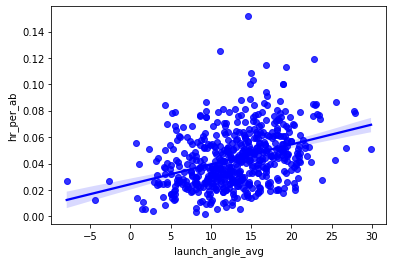

In [23]:
sns.regplot(df.launch_angle_avg, df.hr_per_ab, color='b')

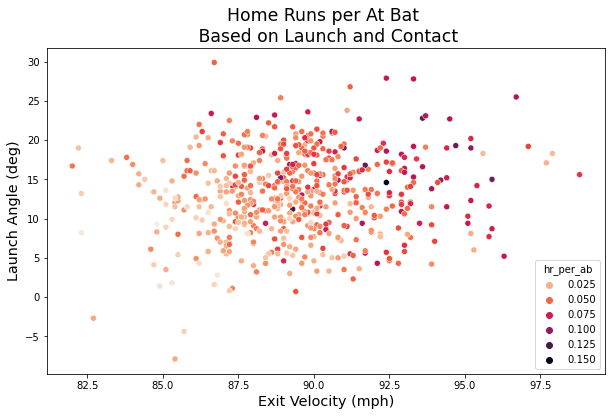

In [60]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=df, x="exit_velocity_avg", y="launch_angle_avg", hue='hr_per_ab', palette='rocket_r')
plt.xlabel('Exit Velocity (mph)', fontsize='x-large')
plt.ylabel('Launch Angle (deg)', fontsize='x-large')
plt.title('Home Runs per At Bat \n Based on Launch and Contact', fontsize='xx-large')

plt.savefig('ev_launch_hr')

Text(0, 0.5, 'Launch Angle (deg)')

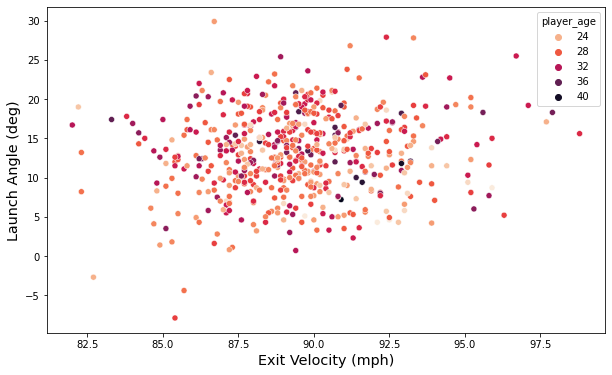

In [66]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=df, x="exit_velocity_avg", y="launch_angle_avg", hue='player_age', palette='rocket_r')
plt.xlabel('Exit Velocity (mph)', fontsize='x-large')
plt.ylabel('Launch Angle (deg)', fontsize='x-large')
# plt.title('Home Runs per At Bat \n Based on Launch and Contact', fontsize='xx-large')

# plt.savefig('ev_launch_hr')

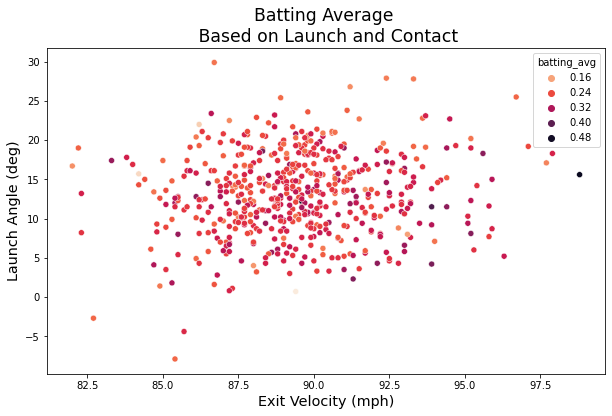

In [97]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=df, x="exit_velocity_avg", y="launch_angle_avg", hue='batting_avg', palette='rocket_r')
plt.xlabel('Exit Velocity (mph)', fontsize='x-large')
plt.ylabel('Launch Angle (deg)', fontsize='x-large')
plt.title('Batting Average \n Based on Launch and Contact', fontsize='xx-large')

plt.savefig('ev_launch_batavg')

In [99]:
display(stats.pearsonr(df.hr_per_ab, df.launch_angle_avg))

(0.363412587479917, 1.2043405228900592e-18)

In [100]:
display(stats.pearsonr(df.batting_avg, df.launch_angle_avg))

(-0.17670781458446078, 3.027583453349359e-05)

In [101]:
df.columns

Index(['last_name', ' first_name', 'player_id', 'year', 'player_age', 'b_ab',
       'b_total_hits', 'b_home_run', 'b_bb_percent', 'batting_avg',
       'on_base_percent', 'on_base_plus_slg', 'b_rbi', 'b_game', 'r_run',
       'exit_velocity_avg', 'launch_angle_avg', 'sweet_spot_percent',
       'barrel_batted_rate', 'Unnamed: 19', 'above_batavg', 'hr_per_ab',
       'runs_per_ab'],
      dtype='object')

In [102]:
X = df.drop(['last_name', ' first_name', 'player_id', 'year','b_ab',
       'b_total_hits', 'b_home_run', 'b_bb_percent', 'on_base_percent', 'on_base_plus_slg', 'b_rbi', 'b_game', 'r_run', 
           'sweet_spot_percent',
       'barrel_batted_rate', 'Unnamed: 19', 'above_batavg', 'runs_per_ab', 'batting_avg'], axis=1)
y = df['batting_avg']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)
  
# model evaluation
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  0.0012031497751141377
mean_absolute_error :  0.027090549056141458


In [104]:
r2_score(y_test, predictions)

0.09129894624360757

Feature: 0, Score: 0.00021
Feature: 1, Score: 0.00300
Feature: 2, Score: -0.00136
Feature: 3, Score: 0.05922


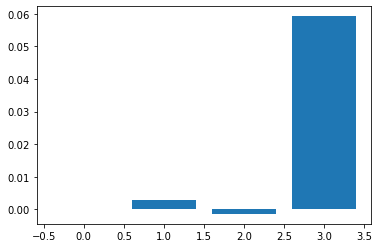

In [105]:
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.savefig('wholefeature')
plt.show()

In [106]:
pitch = pd.read_csv('pitching_stats_baseball.csv')
pitch


,last_name,first_name,player_id,year,player_age,p_formatted_ip,p_strikeout,p_k_percent,p_bb_percent,batting_avg,...,ch_avg_spin,ch_avg_break,n_cukc_formatted,n_sift_formatted,n_fc_formatted,n_fs_formatted,n_fastball_formatted,n_breaking_formatted,n_offspeed_formatted,Unnamed: 38
0,Wainwright,Adam,425794,2020,38,65.2,54,20.6,5.7,0.221,...,1683.0,15.3,38.3,27.1,22.9,NaN,59.2,38.3,2.5,NaN
1,Greinke,Zack,425844,2020,36,67.0,67,24.5,3.3,0.256,...,1668.0,14.0,16.2,0.1,NaN,NaN,43.5,33.2,23.3,NaN
2,Lester,Jon,452657,2020,36,61.0,42,15.8,6.4,0.262,...,1913.0,15.1,12.8,15.2,30.5,NaN,74.7,12.8,12.5,NaN
3,Scherzer,Max,453286,2020,35,67.1,92,31.2,7.8,0.260,...,1440.0,15.0,9.1,NaN,9.6,NaN,55.6,28.4,16.0,NaN
4,Cueto,Johnny,456501,2020,34,63.1,56,20.2,9.4,0.248,...,1333.0,12.5,19.3,10.5,NaN,NaN,43.7,29.2,27.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,Manaea,Sean,640455,2021,29,179.1,194,25.7,5.4,0.255,...,1377.0,14.2,0.7,60.0,NaN,NaN,60.0,15.7,24.3,NaN
186,Mahle,Tyler,641816,2021,26,180.0,210,27.7,8.4,0.234,...,NaN,NaN,NaN,NaN,4.8,15.9,57.7,26.3,15.9,NaN
187,Alcantara,Sandy,645261,2021,25,205.2,201,24.0,6.0,0.223,...,2005.0,16.5,2.6,28.2,NaN,NaN,49.8,26.7,23.5,NaN
188,Cease,Dylan,656302,2021,25,165.2,226,31.9,9.6,0.223,...,1641.0,17.4,15.2,NaN,NaN,NaN,46.8,45.8,7.4,NaN


In [107]:
pitch.columns

Index(['last_name', ' first_name', 'player_id', 'year', 'player_age',
       'p_formatted_ip', 'p_strikeout', 'p_k_percent', 'p_bb_percent',
       'batting_avg', 'p_out', 'p_era', 'exit_velocity_avg',
       'launch_angle_avg', 'barrel_batted_rate', 'pitch_count_offspeed',
       'pitch_count_fastball', 'pitch_count_breaking', 'n', 'n_ff_formatted',
       'ff_avg_speed', 'ff_avg_spin', 'ff_avg_break', 'n_sl_formatted',
       'sl_avg_speed', 'sl_avg_spin', 'sl_avg_break', 'n_ch_formatted',
       'ch_avg_speed', 'ch_avg_spin', 'ch_avg_break', 'n_cukc_formatted',
       'n_sift_formatted', 'n_fc_formatted', 'n_fs_formatted',
       'n_fastball_formatted', 'n_breaking_formatted', 'n_offspeed_formatted',
       'Unnamed: 38'],
      dtype='object')

In [108]:
pitch.player_age.describe()

count    190.000000
mean      29.531579
std        3.904488
min       23.000000
25%       27.000000
50%       29.000000
75%       32.000000
max       43.000000
Name: player_age, dtype: float64

<AxesSubplot:xlabel='player_age', ylabel='Count'>

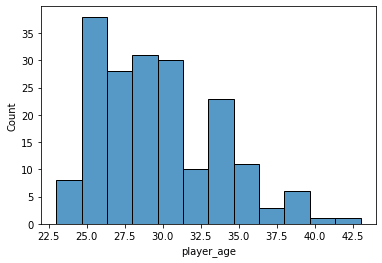

In [109]:
sns.histplot(pitch.player_age)

In [111]:
pitch2 = pitch.dropna( subset = ['ff_avg_speed'])
pitch2
display(stats.pearsonr(pitch2.player_age, pitch2.ff_avg_speed))

(-0.39166138143866114, 3.529546789323402e-08)

C:\Users\arist\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='player_age', ylabel='p_era'>

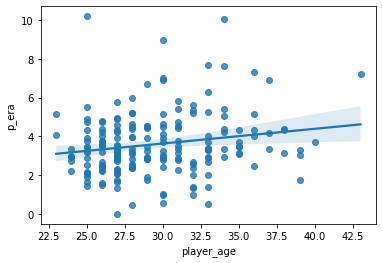

In [112]:
sns.regplot(pitch.player_age, pitch.p_era)

C:\Users\arist\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='player_age', ylabel='n_fastball_formatted'>

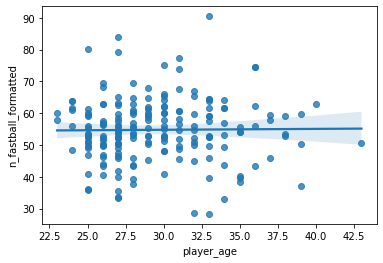

In [113]:
# pitch_count_offspeed', 'pitch_count_fastball', 'pitch_count_breaking'
# 'n_fastball_formatted', 'n_breaking_formatted', 'n_offspeed_formatted'
sns.regplot(pitch.player_age, pitch.n_fastball_formatted)
# sns.regplot(pitch.player_age, pitch.n_breaking_formatted)
# sns.regplot(pitch.player_age, pitch.n_offspeed_formatted)

In [114]:
pitch2 = pitch.dropna( subset = ['n_fastball_formatted'])
pitch2
display(stats.pearsonr(pitch2.player_age, pitch2.n_fastball_formatted))

(0.011184718134972668, 0.8782735793527026)

C:\Users\arist\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='player_age', ylabel='n_breaking_formatted'>

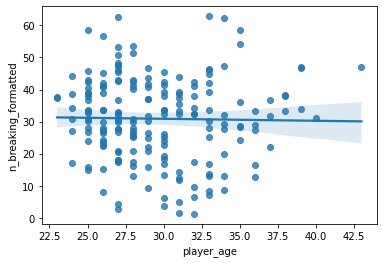

In [115]:
sns.regplot(pitch.player_age, pitch.n_breaking_formatted)

C:\Users\arist\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='player_age', ylabel='n_offspeed_formatted'>

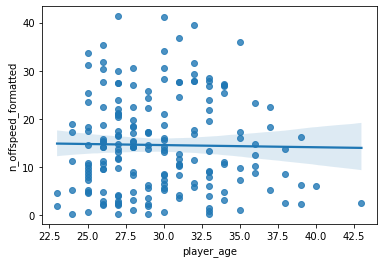

In [116]:
sns.regplot(pitch.player_age, pitch.n_offspeed_formatted)

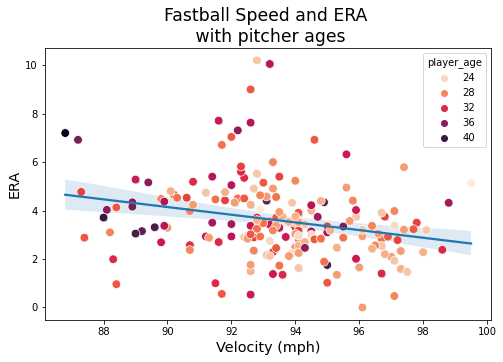

In [176]:
plt.figure(figsize=(8,5))
sns.regplot(data=pitch, x="ff_avg_speed", y="p_era")
sns.scatterplot(data=pitch, x="ff_avg_speed", y="p_era", hue="player_age", palette='rocket_r', s=75)

plt.xlabel('Velocity (mph)', fontsize='x-large')
plt.ylabel('ERA', fontsize='x-large')
plt.title('Fastball Speed and ERA \n with pitcher ages', fontsize='xx-large')

plt.savefig('era_ffvel_age')

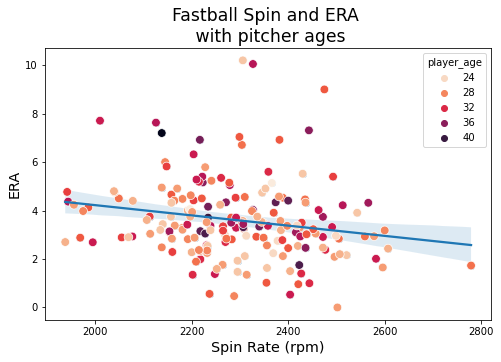

In [180]:
plt.figure(figsize=(8,5))
sns.regplot(data=pitch, x="ff_avg_spin", y="p_era")
sns.scatterplot(data=pitch, x="ff_avg_spin", y="p_era", hue="player_age", palette='rocket_r', s=75)

plt.xlabel('Spin Rate (rpm)', fontsize='x-large')
plt.ylabel('ERA', fontsize='x-large')
plt.title('Fastball Spin and ERA \n with pitcher ages', fontsize='xx-large')

plt.savefig('era_ffspin_age')

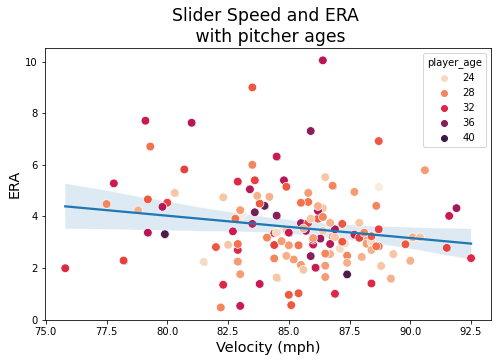

In [178]:
plt.figure(figsize=(8,5))
sns.regplot(data=pitch, x="sl_avg_speed", y="p_era")
sns.scatterplot(data=pitch, x="sl_avg_speed", y="p_era", hue="player_age", palette='rocket_r', s=75)

plt.xlabel('Velocity (mph)', fontsize='x-large')
plt.ylabel('ERA', fontsize='x-large')
plt.title('Slider Speed and ERA \n with pitcher ages', fontsize='xx-large')

plt.savefig('era_slvel_age')

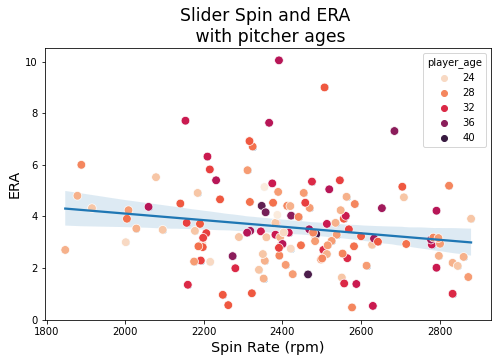

In [181]:
plt.figure(figsize=(8,5))
sns.regplot(data=pitch, x="sl_avg_spin", y="p_era")
sns.scatterplot(data=pitch, x="sl_avg_spin", y="p_era", hue="player_age", palette='rocket_r', s=75)

plt.xlabel('Spin Rate (rpm)', fontsize='x-large')
plt.ylabel('ERA', fontsize='x-large')
plt.title('Slider Spin and ERA \n with pitcher ages', fontsize='xx-large')

plt.savefig('era_slspin_age')

In [172]:
pitch2 = pitch.dropna( subset = ['ff_avg_speed'])
pitch2
display(stats.pearsonr(pitch2.ff_avg_speed, pitch2.p_era))

(-0.2539682313226566, 0.0004861032488512869)

In [119]:
pitch2 = pitch.dropna( subset = ['ff_avg_speed'])
pitch2
display(stats.pearsonr(pitch2.ff_avg_speed, pitch2.player_age))

(-0.39166138143866114, 3.529546789323402e-08)

In [120]:
pitch2 = pitch.dropna( subset = ['sl_avg_speed'])
pitch2
display(stats.pearsonr(pitch2.sl_avg_speed, pitch2.p_era))

(-0.1721671514834589, 0.04424643945708947)

In [121]:
pitch2 = pitch.dropna( subset = ['sl_avg_speed'])
pitch2
display(stats.pearsonr(pitch2.sl_avg_speed, pitch2.player_age))

(-0.16335747356472763, 0.05647347387192214)

<AxesSubplot:xlabel='ff_avg_speed', ylabel='p_era'>

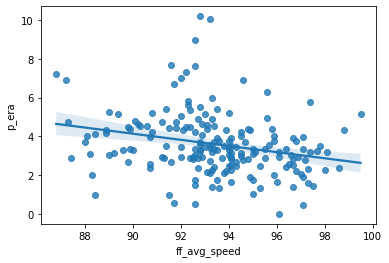

In [122]:
sns.regplot(data=pitch, x="ff_avg_speed", y="p_era")

In [123]:
pitch2 = pitch.dropna( subset = ['ff_avg_spin'])
pitch2
display(stats.pearsonr(pitch2.ff_avg_spin, pitch2.p_era))

(-0.19553923594296024, 0.007644199937194489)

In [124]:
pitch2 = pitch.dropna( subset = ['ff_avg_spin'])
pitch2
display(stats.pearsonr(pitch2.ff_avg_spin, pitch2.player_age))

(0.002643288280248575, 0.9715144039777139)

In [125]:
pitch2 = pitch.dropna( subset = ['sl_avg_spin'])
pitch2
display(stats.pearsonr(pitch2.sl_avg_spin, pitch2.p_era))

(-0.18079379588177347, 0.03449797422191335)

In [126]:
pitch2 = pitch.dropna( subset = ['sl_avg_spin'])
pitch2
display(stats.pearsonr(pitch2.sl_avg_spin, pitch2.player_age))

(0.0788212784278583, 0.35990211721075177)

<AxesSubplot:xlabel='ff_avg_spin', ylabel='p_era'>

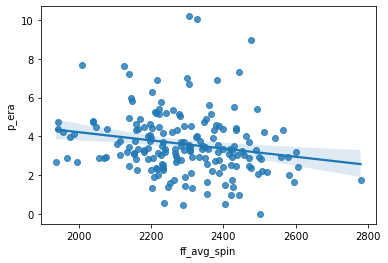

In [127]:
sns.regplot(data=pitch, x="ff_avg_spin", y="p_era")

<AxesSubplot:xlabel='ff_avg_break', ylabel='p_era'>

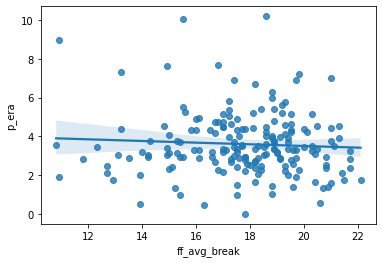

In [128]:
sns.regplot(data=pitch, x="ff_avg_break", y="p_era")

<AxesSubplot:xlabel='ff_avg_spin', ylabel='ff_avg_speed'>

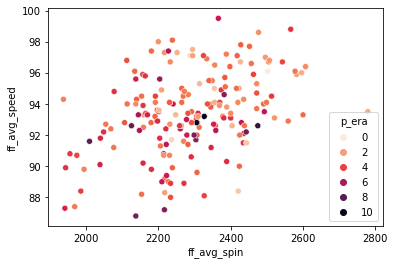

In [149]:
sns.scatterplot(data=pitch, x="ff_avg_spin", y="ff_avg_speed", hue='p_era', palette='rocket_r')

<AxesSubplot:xlabel='sl_avg_spin', ylabel='sl_avg_speed'>

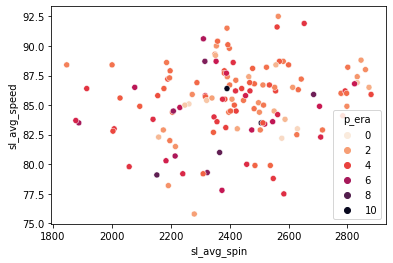

In [150]:
sns.scatterplot(data=pitch, x="sl_avg_spin", y="sl_avg_speed", hue='p_era', palette='rocket_r')

<AxesSubplot:xlabel='ch_avg_spin', ylabel='ch_avg_speed'>

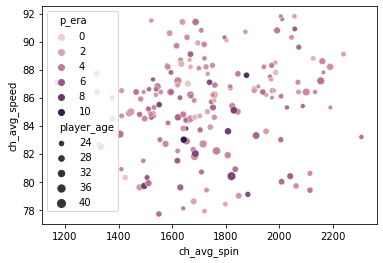

In [131]:
sns.scatterplot(data=pitch, x="ch_avg_spin", y="ch_avg_speed", hue='p_era', size='player_age')

<AxesSubplot:xlabel='ff_avg_spin', ylabel='p_era'>

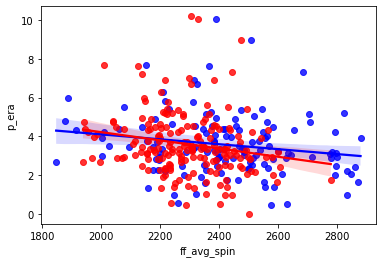

In [132]:
sns.regplot(data=pitch, x="sl_avg_spin", y="p_era", color='b')
sns.regplot(data=pitch, x="ff_avg_spin", y="p_era", color='r')

<AxesSubplot:xlabel='ff_avg_speed', ylabel='p_era'>

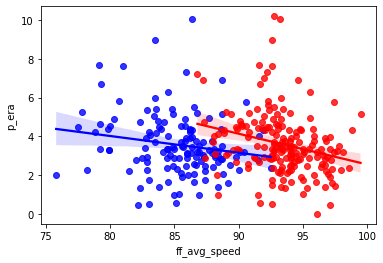

In [133]:
sns.regplot(data=pitch, x="sl_avg_speed", y="p_era", color='b')
sns.regplot(data=pitch, x="ff_avg_speed", y="p_era", color='r')

<AxesSubplot:xlabel='ff_avg_break', ylabel='p_era'>

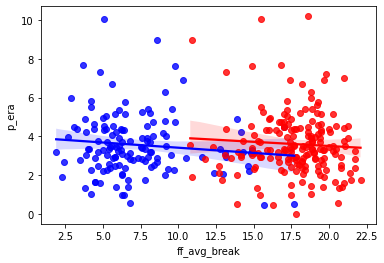

In [134]:
sns.regplot(data=pitch, x="sl_avg_break", y="p_era", color='b')
sns.regplot(data=pitch, x="ff_avg_break", y="p_era", color='r')

<AxesSubplot:xlabel='n_fastball_formatted', ylabel='p_k_percent'>

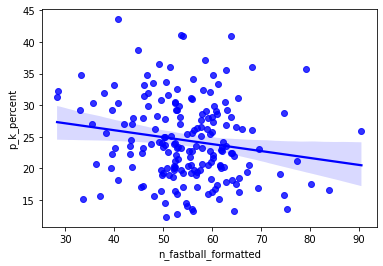

In [135]:
sns.regplot(data=pitch, x="n_fastball_formatted", y="p_k_percent", color='b')

<AxesSubplot:xlabel='n_breaking_formatted', ylabel='p_k_percent'>

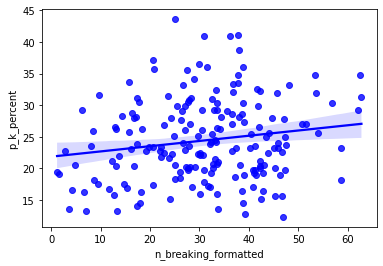

In [136]:
sns.regplot(data=pitch, x="n_breaking_formatted", y="p_k_percent", color='b')

In [137]:
pitch2 = pitch.dropna( subset = ['n_breaking_formatted'])
pitch2
display(stats.pearsonr(pitch2.n_breaking_formatted, pitch2.p_era))

(-0.05563638831981013, 0.44580652326128395)

In [138]:
pitch2 = pitch.dropna( subset = ['n_fastball_formatted'])
pitch2
display(stats.pearsonr(pitch2.n_fastball_formatted, pitch2.p_era))

(0.07224361127932044, 0.3219136052890207)

In [139]:
pitch2 = pitch.dropna( subset = ['ff_avg_speed'])
pitch2
display(stats.pearsonr(pitch2.ff_avg_speed, pitch2.p_era))

(-0.2539682313226566, 0.0004861032488512869)

In [146]:
pitch.p_era.describe()

count    190.000000
mean       3.602316
std        1.603481
min        0.000000
25%        2.700000
50%        3.360000
75%        4.407500
max       10.200000
Name: p_era, dtype: float64

In [140]:
pitch.ff_avg_speed.describe()

count    185.000000
mean      93.389730
std        2.588174
min       86.800000
25%       92.000000
50%       93.300000
75%       95.000000
max       99.500000
Name: ff_avg_speed, dtype: float64

In [141]:
pitch.ff_avg_spin.describe()

count     185.000000
mean     2291.194595
std       149.343509
min      1938.000000
25%      2200.000000
50%      2288.000000
75%      2398.000000
max      2779.000000
Name: ff_avg_spin, dtype: float64

In [143]:
pitch.sl_avg_speed.describe()

count    137.000000
mean      85.258394
std        3.149828
min       75.800000
25%       83.500000
50%       85.700000
75%       87.200000
max       92.500000
Name: sl_avg_speed, dtype: float64

In [144]:
pitch.sl_avg_spin.describe()

count     137.000000
mean     2422.963504
std       225.140329
min      1847.000000
25%      2289.000000
50%      2412.000000
75%      2557.000000
max      2880.000000
Name: sl_avg_spin, dtype: float64

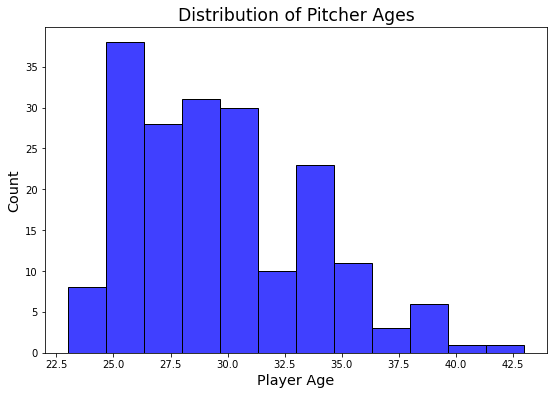

In [182]:
plt.figure(figsize=(9,6))
sns.histplot(pitch.player_age, color='b')
plt.xlabel('Player Age', fontsize='x-large')
plt.ylabel('Count', fontsize='x-large')
plt.title('Distribution of Pitcher Ages', fontsize='xx-large')
plt.savefig('pitcher_ages_dist')